## <div style="text-align: center">cs229: Problem Set 3, Problem 5</div>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.image import imread; 

In [5]:
dir = './images/'
A_large = imread(dir+'mandrill-large.tiff')

<a id='5a'></a>
### Problem 5.a)

In [9]:
plt.imshow(A_large) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-9-48bcce88ea55>, line 1)

In [7]:
A_small = imread(dir+'mandrill-small.tiff')

<a id='5b'></a>
### Problem 5.b)

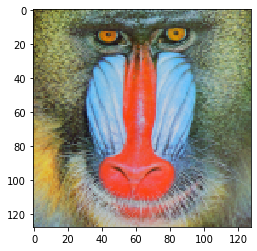

In [8]:
plt.imshow(A_small) 
plt.show()

In [11]:
A_small.shape

(128, 128, 3)

In [19]:
np.expand_dims(A_small, axis=3).shape

(128, 128, 3, 1)

In [24]:
np.repeat(np.expand_dims(A_small, axis=3), 16, axis=3)

(128, 3, 16)

<a id='5c'></a>
### Problem 5.c)

In [39]:
K = 16

In [135]:
img = A_small
K = 16
K_iter = 30
K_init = np.random.randint(0, A_small.shape[0], size=(K,2))

P = np.repeat(np.expand_dims(img, axis=3), K, axis=3)

# Get K samples of (r,g,b) pixels, set as initial centroids for each of K clusters
C_k = np.zeros((A_small.shape[2], K))
for i in range(K_iter):
    if i == 0:
        for k in range(K):
            pixel_sample = img[C_k_samples[k][0], C_k_samples[k][1],:]   
            C_k[:,k] = pixel_sample
    else:
        # Calculate centroid of each cluster
        for k in range(K):
            C_k[:,k] = img[C_closest == k].mean(axis=0)

    # Get distances for each (r,g,b) pixel in image, from each of K cluster centroids
    C_norms = np.linalg.norm((P[:,:] - C_k), axis=2)

    # get closest of K cluster centroids, to each pixel
    C_closest = np.argmin(C_norms, axis=2)
    
    weighted_mean_norm = 0.0
    mean_norm = 0.0
    
    for k in range(K):
        mean_norm_k = C_norms[C_closest == k,k].mean()
        mean_norm += mean_norm_k/K
        weighted_mean_norm += C_closest[C_closest == k].shape[0]*mean_norm_k
        
        #print(f"Average Distance for Cluster {k}: {mean_norm_k}")
    weighted_mean_norm /= (img.shape[0]*img.shape[1])
    
    print(f"Simple, Weight Average Distance for All Clusters: {mean_norm}, {weighted_mean_norm}")

# Over M = 30 iterations
#   (E-Step): For each centroid
#     calculate avg center point, among pixesl in cluster
#   (M-Step): For each point, calculate closest cluster centroid

Simple, Weight Average Distance for All Clusters: 26.546388702124737, 27.02087795146617
Simple, Weight Average Distance for All Clusters: 22.20345042178714, 21.688224038566446
Simple, Weight Average Distance for All Clusters: 21.474062672442436, 20.642495331078518
Simple, Weight Average Distance for All Clusters: 21.20004328483486, 20.34757754239817
Simple, Weight Average Distance for All Clusters: 21.0114273406668, 20.165549044834474
Simple, Weight Average Distance for All Clusters: 20.79324328122233, 19.946805582151285
Simple, Weight Average Distance for All Clusters: 20.611453140501293, 19.738054334802527
Simple, Weight Average Distance for All Clusters: 20.52031394114032, 19.625235648119915
Simple, Weight Average Distance for All Clusters: 20.493215528157627, 19.58067718532281
Simple, Weight Average Distance for All Clusters: 20.486671701733083, 19.55901301274284
Simple, Weight Average Distance for All Clusters: 20.469604936582567, 19.543378330939667
Simple, Weight Average Distance

In [142]:
img = A_large.copy()
P = np.repeat(np.expand_dims(img, axis=3), K, axis=3)
# Get distances for each (r,g,b) pixel in image, from each of K cluster centroids
C_norms = np.linalg.norm((P[:,:] - C_k), axis=2)

# get closest of K cluster centroids, to each pixel
C_closest = np.argmin(C_norms, axis=2)

for k in range(K):
    img[C_closest == k] = C_k[:,k]

weighted_mean_norm = 0.0
mean_norm = 0.0

for k in range(K):
    mean_norm_k = C_norms[C_closest == k,k].mean()
    mean_norm += mean_norm_k/K
    weighted_mean_norm += C_closest[C_closest == k].shape[0]*mean_norm_k

    #print(f"Average Distance for Cluster {k}: {mean_norm_k}")
weighted_mean_norm /= (img.shape[0]*img.shape[1])

print(f"Simple, Weight Average Distance for All Clusters: {mean_norm}, {weighted_mean_norm}")


Simple, Weight Average Distance for All Clusters: 23.959977010030023, 23.57263058067659


In [143]:
img[C_closest == 0].shape

(14642, 3)

In [144]:
C_k[:,0].shape

(3,)

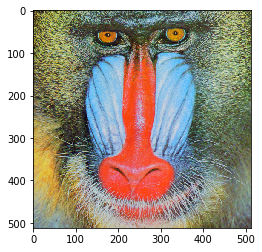

In [145]:
plt.imshow(A_large)
plt.
plt.show()

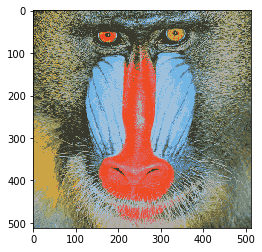

In [146]:
plt.imshow(img) 
plt.show()

<a id='5d'></a>
### Problem 5.d)

### Original image uses (3) 8-bit numbers to represent each pixel's color ==> 2^(8 * 3) possible colors
### New image uses just 16 colors == 2^4 colors. ==> We've compressed each pixel by factor of 2^(24 - 4), or 2^20, or 1.05 * 10e6